## SMS Spam Classifier: Bernoulli Naive Bayes

The notebook is divided into the following sections:
1. Importing and preprocessing data
2. Building the model: Bernoulli Naive Bayes

In [2]:
import pandas as pd
docs = pd.read_table('SMSSpamCollection', header=None, names=['Class', 'sms'])
docs.head()

,Class,sms
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [3]:
#df.column_name.value_counts() - gives no. of unique inputs in that columns
docs.Class.value_counts()

ham     4825
spam     747
Name: Class, dtype: int64

In [4]:
ham_spam=docs.Class.value_counts()
ham_spam

ham     4825
spam     747
Name: Class, dtype: int64

In [5]:
print("Spam % is ",(ham_spam[1]/float(ham_spam[0]+ham_spam[1]))*100)

Spam % is  13.406317300789663


In [6]:
# mapping labels to 1 and 0
docs['label'] = docs.Class.map({'ham':0, 'spam':1})

In [7]:
docs.head()

,Class,sms,label
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


In [8]:
X=docs.sms
y=docs.label

In [9]:
X = docs.sms
y = docs.label
print(X.shape)
print(y.shape)

(5572,)
(5572,)


In [10]:
# splitting into test and train

from sklearn.model_selection  import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [11]:
X_train.head()

710     4mths half price Orange line rental & latest c...
3740                           Did you stitch his trouser
2711    Hope you enjoyed your new content. text stop t...
3155    Not heard from U4 a while. Call 4 rude chat pr...
3748    Ü neva tell me how i noe... I'm not at home in...
Name: sms, dtype: object

In [12]:
from sklearn.feature_extraction.text import CountVectorizer

# vectorising the text
vect = CountVectorizer(stop_words='english')

In [13]:
vect.fit(X_train)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words='english',
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [14]:
vect.vocabulary_

{'shocking': 5675,
 'moan': 4243,
 'immed': 3381,
 'youwanna': 7177,
 'collected': 1783,
 'steed': 6012,
 '150p16': 294,
 'current': 1996,
 'female': 2629,
 'eightish': 2400,
 'das': 2043,
 '08719181503': 145,
 '8wp': 698,
 'soon': 5868,
 'mad1': 4022,
 'effects': 2391,
 'sometext': 5853,
 'woah': 7034,
 'manage': 4053,
 'obedient': 4546,
 'caught': 1587,
 'edu': 2383,
 'proper': 5078,
 'o2': 4544,
 'prescripiton': 5009,
 'lovly': 3965,
 'lakhs': 3736,
 'deluxe': 2111,
 'wamma': 6851,
 'suite342': 6133,
 'excellent': 2513,
 '〨ud': 7203,
 'kaiez': 3631,
 'tell': 6289,
 'puttin': 5125,
 'refund': 5267,
 'tirunelvali': 6429,
 '08701417012': 74,
 'ipaditan': 3486,
 '69988': 584,
 'm95': 4008,
 'blow': 1311,
 'takes': 6230,
 'company': 1812,
 'deltomorrow': 2110,
 'searching': 5553,
 'videosound': 6768,
 'cried': 1959,
 'building': 1458,
 'chaps': 1629,
 'conveying': 1880,
 'tmr': 6443,
 'fault': 2605,
 'jersey': 3566,
 '449050000301': 485,
 'cupboard': 1993,
 '28days': 369,
 'sponsors': 59

In [15]:
vect.get_feature_names()

['00',
 '000',
 '008704050406',
 '0121',
 '01223585236',
 '01223585334',
 '0125698789',
 '02',
 '0207',
 '02072069400',
 '02073162414',
 '02085076972',
 '021',
 '03',
 '04',
 '0430',
 '05',
 '050703',
 '0578',
 '06',
 '07',
 '07008009200',
 '07090201529',
 '07090298926',
 '07123456789',
 '07732584351',
 '07734396839',
 '07742676969',
 '0776xxxxxxx',
 '07781482378',
 '07786200117',
 '078',
 '07801543489',
 '07808',
 '07808247860',
 '07808726822',
 '07815296484',
 '07821230901',
 '07880867867',
 '0789xxxxxxx',
 '07946746291',
 '0796xxxxxx',
 '07973788240',
 '07xxxxxxxxx',
 '08',
 '0800',
 '08000407165',
 '08000776320',
 '08000839402',
 '08000930705',
 '08000938767',
 '08001950382',
 '08002888812',
 '08002986030',
 '08002986906',
 '08002988890',
 '08006344447',
 '0808',
 '08081263000',
 '08081560665',
 '0825',
 '083',
 '0844',
 '08448714184',
 '0845',
 '08450542832',
 '08452810071',
 '08452810073',
 '08452810075over18',
 '0870',
 '08700435505150p',
 '08700469649',
 '08700621170150p',
 '08

In [16]:
# transform
X_train_transformed = vect.transform(X_train)
X_test_tranformed =vect.transform(X_test)

In [17]:
from sklearn.naive_bayes import BernoulliNB

# instantiate bernoulli NB object
bnb = BernoulliNB()

# fit 
bnb.fit(X_train_transformed,y_train)

# predict class
y_pred_class = bnb.predict(X_test_tranformed)

# predict probability
y_pred_proba =bnb.predict_proba(X_test_tranformed)

# accuracy
from sklearn import metrics
metrics.accuracy_score(y_test, y_pred_class)


0.9770279971284996

In [18]:
bnb

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [19]:
metrics.confusion_matrix(y_test, y_pred_class)

array([[1207,    1],
       [  31,  154]])

In [20]:
confusion = metrics.confusion_matrix(y_test, y_pred_class)
print(confusion)
#[row, column]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]
TP = confusion[1, 1]

[[1207    1]
 [  31  154]]


In [21]:
sensitivity = TP / float(FN + TP)
print("sensitivity",sensitivity)

sensitivity 0.8324324324324325


In [22]:
specificity = TN / float(TN + FP)

print("specificity",specificity)

specificity 0.9991721854304636


In [23]:
precision = TP / float(TP + FP)

print("precision",precision)
print(metrics.precision_score(y_test, y_pred_class))

precision 0.9935483870967742
0.9935483870967742


In [24]:
print("precision",precision)
print("PRECISION SCORE :",metrics.precision_score(y_test, y_pred_class))
print("RECALL SCORE :", metrics.recall_score(y_test, y_pred_class))
print("F1 SCORE :",metrics.f1_score(y_test, y_pred_class))

precision 0.9935483870967742
PRECISION SCORE : 0.9935483870967742
RECALL SCORE : 0.8324324324324325
F1 SCORE : 0.9058823529411765


In [25]:
y_pred_proba

array([[1.00000000e+00, 1.54647985e-10],
       [1.00000000e+00, 1.69177313e-10],
       [9.99999997e-01, 2.52488636e-09],
       ...,
       [9.99994219e-01, 5.78141360e-06],
       [3.64570741e-06, 9.99996354e-01],
       [1.00000000e+00, 2.90374743e-12]])

In [26]:
from sklearn.metrics import confusion_matrix as sk_confusion_matrix
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred_proba[:,1])
roc_auc = auc(false_positive_rate, true_positive_rate)

In [27]:
print (roc_auc)

0.9967692858421334


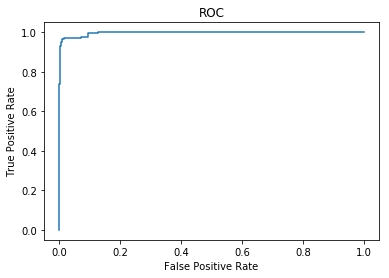

In [31]:
%matplotlib inline  
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC')
plt.plot(false_positive_rate, true_positive_rate)